<a href="https://colab.research.google.com/github/MiteshBhula/AI-ML-Projects/blob/main/Mitesh_Bhula_INN_Learner_Notebook_Full_code_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

## Loading the dataset

In [ ]:
data = pd.read_csv("Churn.csv")

In [ ]:
# Creating a copy of the dataset
cdata = data.copy()

## Data Overview

In [ ]:
# Displaying the top 5 rows of the data
cdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* The first five rows in the dataset.

In [ ]:
# Displaying the last 5 rows of the data
cdata.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


* The last five rows of the dataset.

In [ ]:
# Understanding the shape of the data
cdata.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns.

In [ ]:
# Viewing the data types of each column within the dataset
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000 observations and 14 columns in the data.
* 3 columns are of the object datatype, 9 are of type int64 and 2 are of type float64.  

In [ ]:
# Statistical summary of the dataset
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* CustomerId is an ID column and will be dropped.
* 92 is the age of the oldest client, with 25% between 18 and 32 years of age.
* The maximum number of products held by a client is 4, 75% of clients have 2 products.

In [ ]:
# Checking for unique values in each column
cdata.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Each value of the column 'CustomerId' is a unique idenfifier for a client. I will drop this column as it will not add any predictive value to the model.
* The 'CreditScore' column has 460 unique credit scores.


In [ ]:
# Checking for missing values in the dataset
cdata.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no missing values within the dataset.

In [ ]:
# Dropping the ID column
cdata.drop(columns = "CustomerId", inplace = True)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

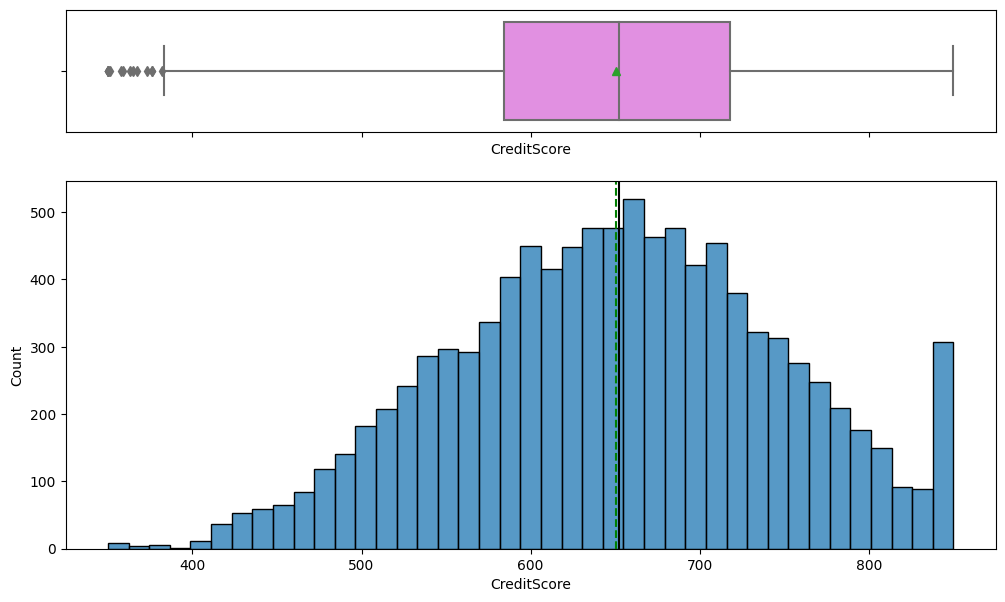

In [ ]:
# CreditScore column
histogram_boxplot(cdata, 'CreditScore')

* The CreditScore is left-skewed and majority of the clients have a score between 600 and 700.

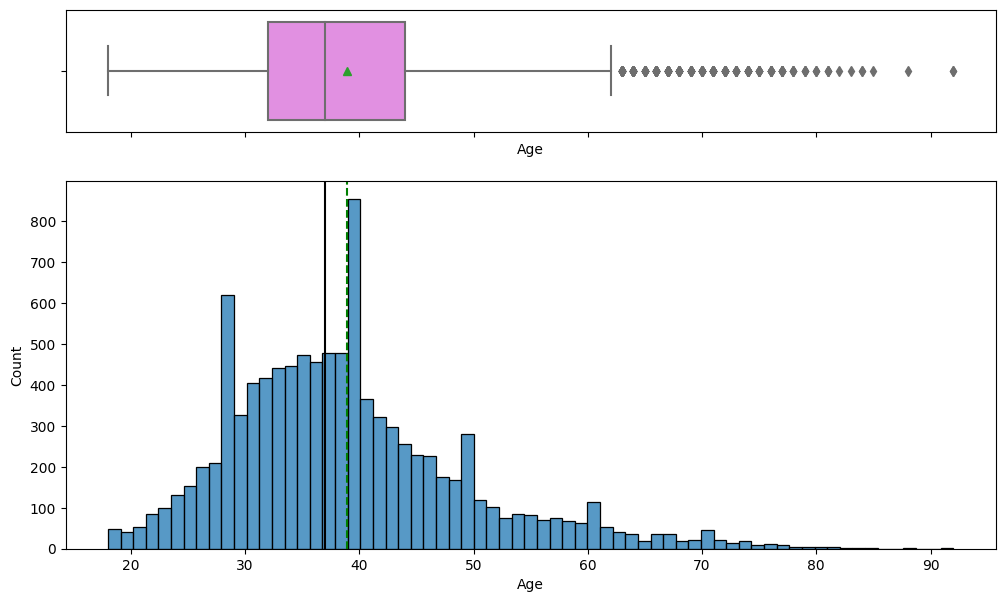

In [ ]:
# Age column
histogram_boxplot(cdata, 'Age')

* Age is right-skewed from this plot with the median age being around 36 years of age.

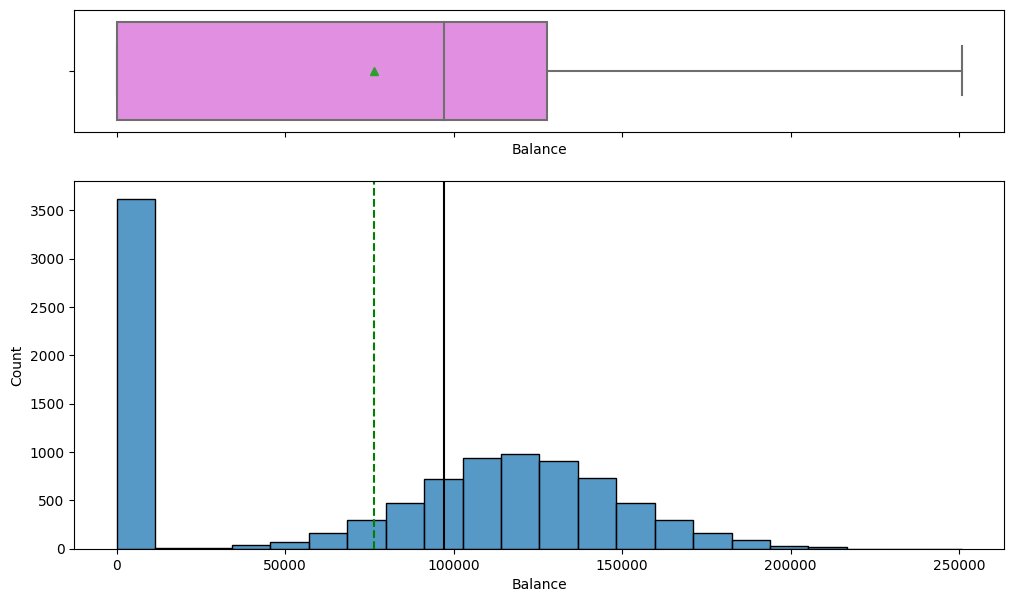

In [ ]:
# Balance column
histogram_boxplot(cdata, 'Balance')

* From the plot above, we notice that there are a large number of clients who have a balance between 0 and 10 000.

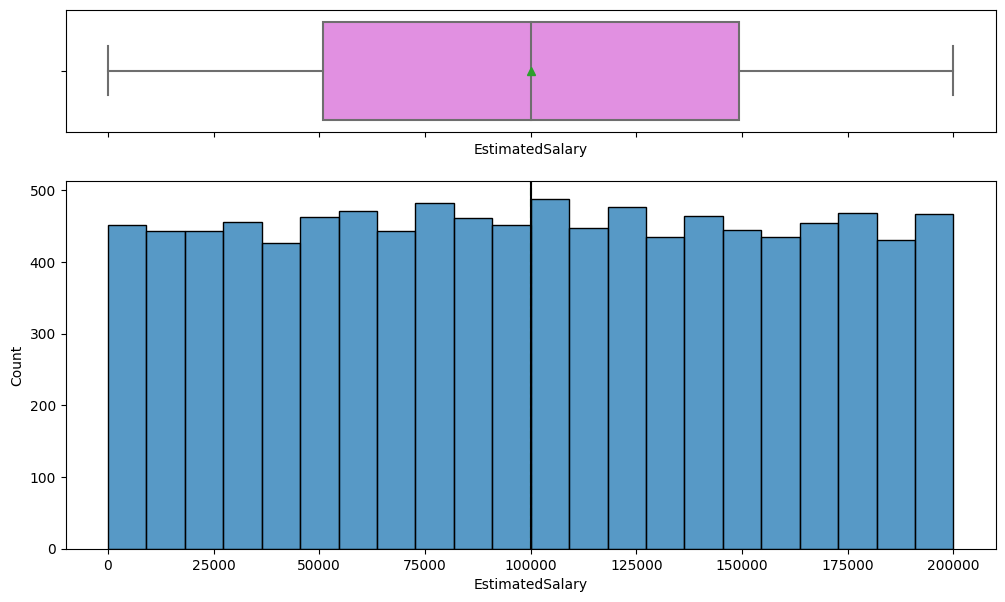

In [ ]:
# Estimated salary column
histogram_boxplot(cdata, 'EstimatedSalary')

* As per the above plot, the estimated salary of clients is evenly distributed from 0 to 200 000.

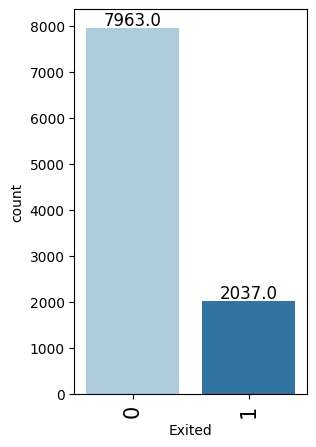

In [ ]:
# Exited column
labeled_barplot(cdata, 'Exited')

* There are more clients who have not exited the bank than those who have in the dataset.

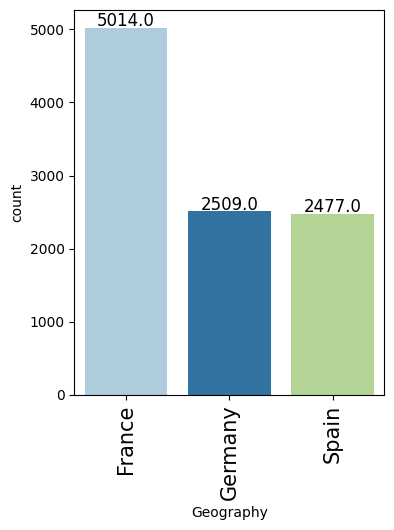

In [ ]:
# Geography column
labeled_barplot(cdata, 'Geography')

* There are almost double the amount of clients from France than Germany and Spain. This could indicate the data is baised to clients based in France.

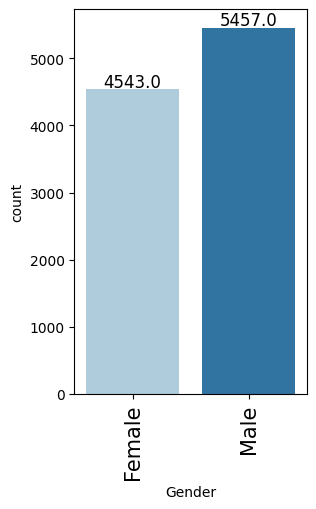

In [ ]:
# Gender column
labeled_barplot(cdata, 'Gender')

* There are 914 more male than female clients within the dataset.

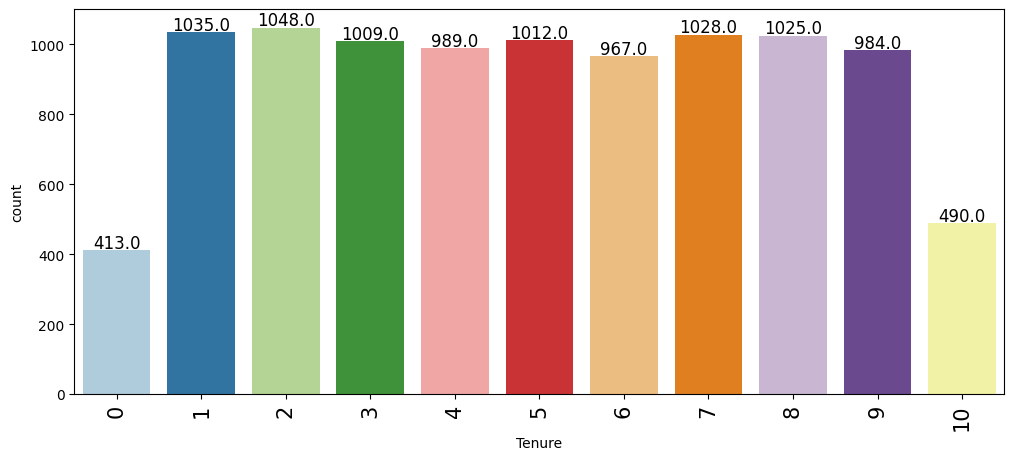

In [ ]:
# Tenure column
labeled_barplot(cdata, 'Tenure')

* 25% of clients have a tenure less than or equal to 3.

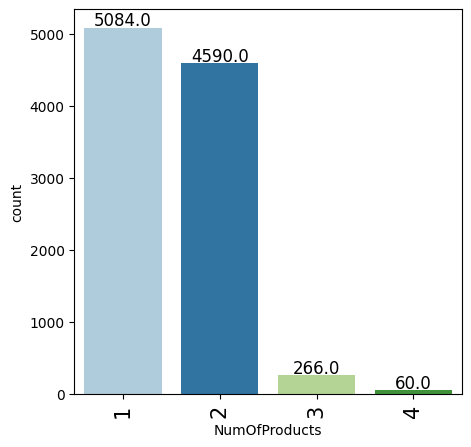

In [ ]:
# Number of products column
labeled_barplot(cdata, 'NumOfProducts')

50% of clients have one product from the bank.

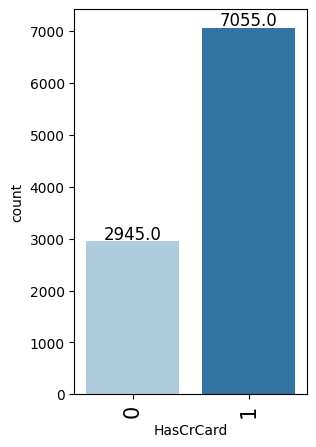

In [ ]:
# Has credit card column
labeled_barplot(cdata, 'HasCrCard')

70% of clients have a credit card from the bank.

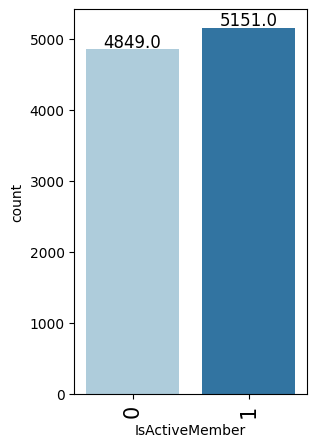

In [ ]:
# Is active member
labeled_barplot(cdata, 'IsActiveMember')

* 51% of clients regularly use the banks products to complete transactions, deposits and withdrawals.

In [ ]:
# Bivariate Analysis
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

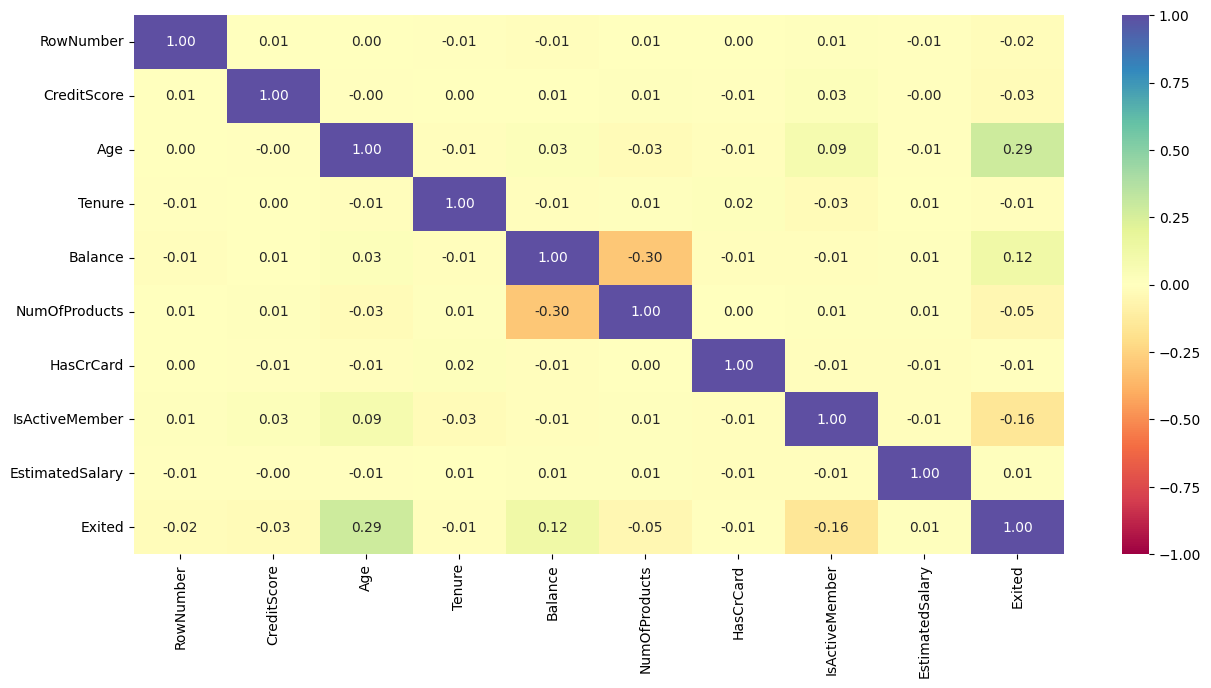

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cdata.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Balance and Tenure have a correclation of -0.30
* Age and Exited have a correlation of 0.29

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


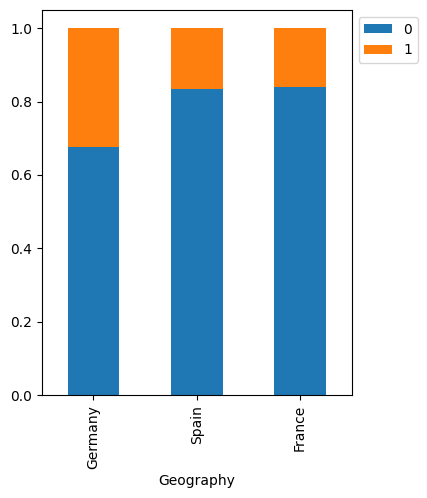

In [ ]:
# Exited vs Geography
stacked_barplot(cdata, 'Geography', 'Exited')

* From the above plot we can identify that clients from Spain and France are less likely to exit the bank than those from Germany. Geography may influence the number of clients who exit the bank.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


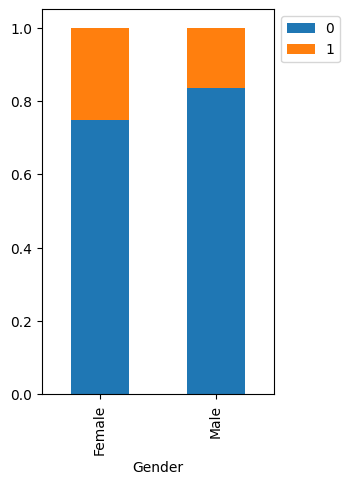

In [ ]:
# Exited vs Gender
stacked_barplot(cdata, 'Gender', 'Exited')

* Females are slighly more likely to exit the bank than males.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


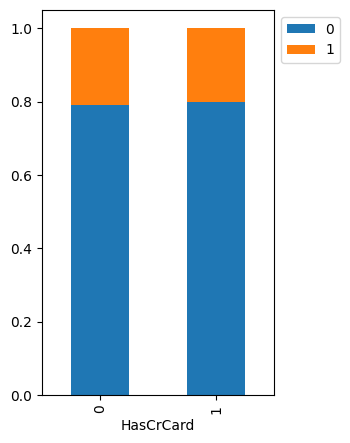

In [ ]:
# Exited vs Has credit card
stacked_barplot(cdata, 'HasCrCard', 'Exited')

* From the above plot, it is observed that the likelihood of a client exiting the bank is not dependent on whether they have a credit card or not.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


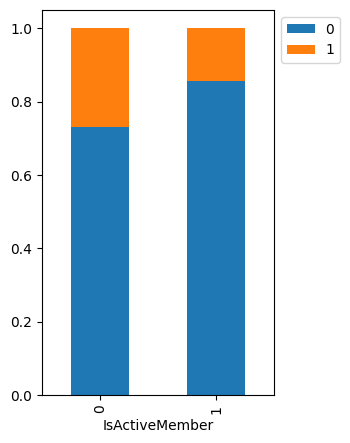

In [ ]:
# Exited vs Is active member
stacked_barplot(cdata, 'IsActiveMember', 'Exited')

* Clients who aren't active members of the bank are more likely to exit the bank than those who are.

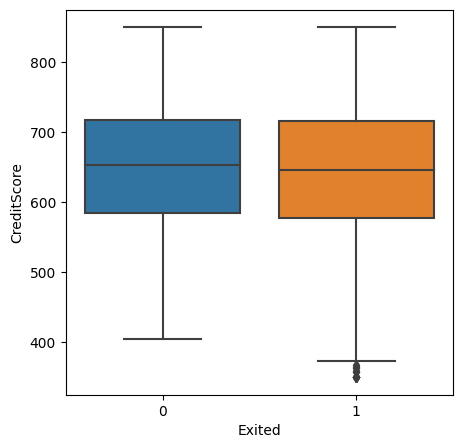

In [ ]:
# Exited vs Credit score
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=cdata)
plt.show()

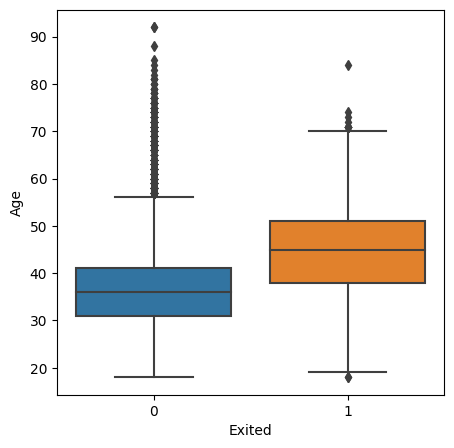

In [ ]:
# Exited vs Age
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=cdata)
plt.show()

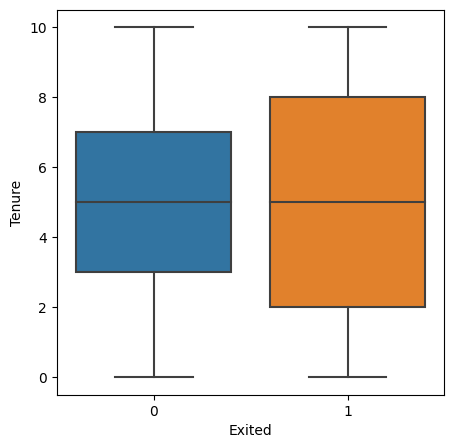

In [ ]:
# Exited vs Tenure
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=cdata)
plt.show()

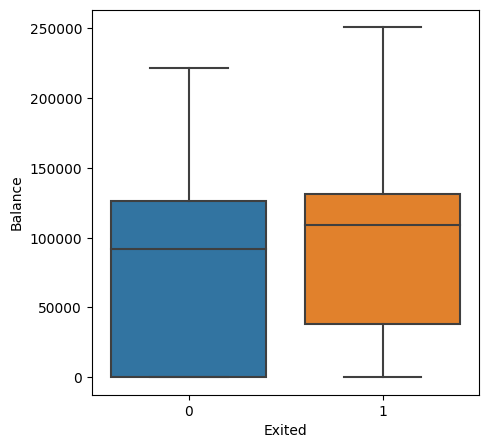

In [ ]:
# Exited vs Balance
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=cdata)
plt.show()

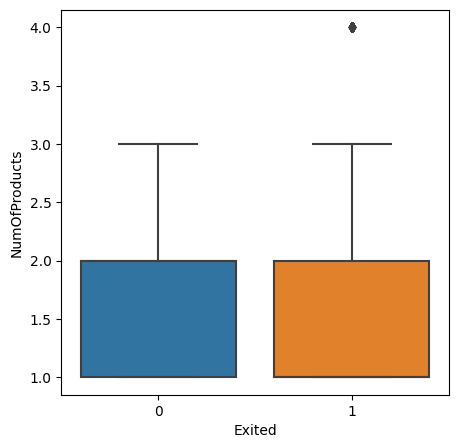

In [ ]:
# Exited vs Number of products
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=cdata)
plt.show()

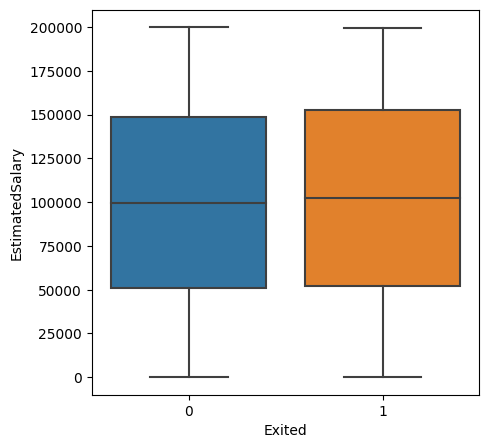

In [ ]:
# Exited vs Estimated Salary
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=cdata)
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
X = cdata.drop(['Exited'],axis=1)
y = cdata[['Exited']]

In [ ]:
# Splitting the data into training and test sets
X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
# Encoding and creating dummy variables for string variables
X_train = pd.get_dummies(X_train, columns =["Geography","Gender"], drop_first = True)
X_test = pd.get_dummies(X_test, columns = ["Geography","Gender"], drop_first = True)
X_val = pd.get_dummies(X_val, columns = ["Geography","Gender",], drop_first = True)

In [ ]:
# Normalising the numerical columns
sc = StandardScaler()
temp = sc.fit(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 13)
(2000, 13)
(6400, 1)
(2000, 1)


## Model Building

### Model Evaluation Criterion

* Predicting a customer is exiting and the customer is not exiting
* Predicting a customer is not exiting and customer is exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

In [ ]:
# Function that will be used to plot the confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

Using the Label Encoding technique to encode the values of the categorical columns in the dataset.

In [ ]:
# Encoding the surname column
from sklearn.preprocessing import LabelEncoder
labelencoder_Surname = LabelEncoder()
X_train['Surname'] = labelencoder_Surname.fit_transform(X_train['Surname'])
X_val['Surname'] = labelencoder_Surname.fit_transform(X_val['Surname'])
X_test['Surname'] = labelencoder_Surname.fit_transform(X_test['Surname'])

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Complete the code to Add the input layer with 64 neurons with relu as activation function with input of 11 variables
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

# Complete the code to add the 1st hidden layer with 32 neurons
classifier.add(Dense(32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Complete the code to Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Complete the code to obtain the summary of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


# Observations
* The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
* It also shows the total number of trainable and non-trainable parameters in the model.
* A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.


In [ ]:
X_train,X_test = X_train.align(X_test,join='outer',axis=1,fill_value=0)
X_train,X_val = X_train.align(X_val,join='outer',axis=1,fill_value=0)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6400, 13)
(1600, 13)
(2000, 13)
(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
## Complete the code to fit the model on train data for 100 epochs
history=classifier.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100


ValueError: ignored

ValueError: ignored

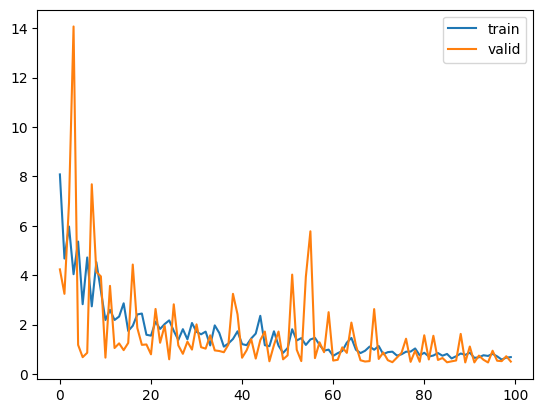

In [ ]:
# Loss function
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

In [ ]:
# Confusion Matrix
## Complete the code to obtain the prediction on X_val and obtain the confusion matrix
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

ValueError: ignored

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ##Complete the code to add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      ## Complete the code to add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))

      ## Complete the code to add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ## Complete the code to initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data
history = model.fit(X_train, y_train, batch_size=32, validation_data = (X_val,y_val), epochs=100, verbose=1)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 8.0794 - accuracy: 0.6775 - val_loss: 4.2351 - val_accuracy: 0.7956
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 4.6732 - accuracy: 0.6830 - val_loss: 3.2447 - val_accuracy: 0.7944
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 5.9696 - accuracy: 0.6933 - val_loss: 6.9258 - val_accuracy: 0.2131
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 4.0393 - accuracy: 0.6861 - val_loss: 14.0689 - val_accuracy: 0.7962
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 5.3611 - accuracy: 0.6947 - val_loss: 1.1778 - val_accuracy: 0.5312
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 2.8250 - accuracy: 0.7028 - val_loss: 0.6798 - val_accuracy: 0.6925
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 4.7167 - accuracy: 0.6977 - val_loss: 0.8581 - val_accuracy: 0.630

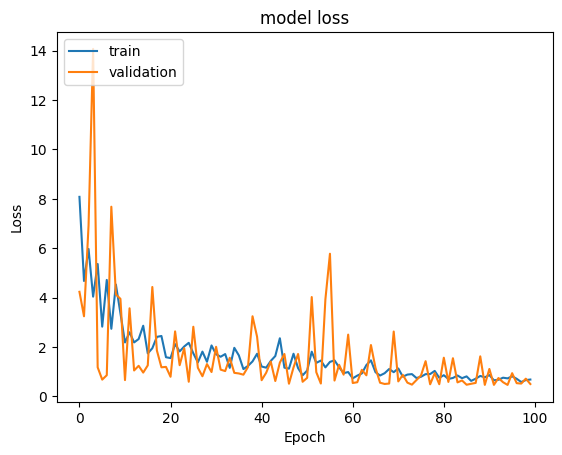

In [ ]:
# Loss function
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The model seems to have overfitted, the distance between the train curve and validation curve has increased.

In [ ]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to call the create_model() function
model_e = create_model()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose = 1, validation_data = (X_val, y_val), callbacks = [es_cb])

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 14.1085 - accuracy: 0.6825 - val_loss: 8.3738 - val_accuracy: 0.7887
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 4.0020 - accuracy: 0.6861 - val_loss: 3.8373 - val_accuracy: 0.2369
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 5.3808 - accuracy: 0.6856 - val_loss: 4.6563 - val_accuracy: 0.7956
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 3.4921 - accuracy: 0.6925 - val_loss: 9.3741 - val_accuracy: 0.7944
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 2.0181 - accuracy: 0.7089 - val_loss: 1.0606 - val_accuracy: 0.7744
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 3.4429 - accuracy: 0.6958 - val_loss: 0.9704 - val_accuracy: 0.7781
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 3.5220 - accuracy: 0.7077 - val_loss: 1.1224 - val_accuracy: 0.600

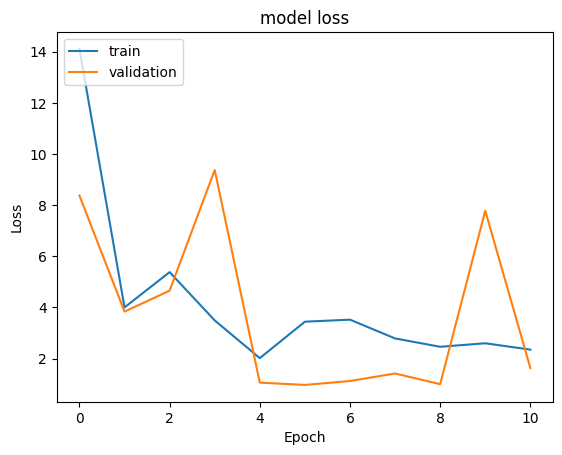

In [ ]:
# Loss function
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* As per the plot above this model as also overfitted as the gap between the train and validation lines is increasing between Epoch 2 and 4 and 8 and 10. The model may have underfitted between Epoch 4 to 8.  

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.000125, G-Mean=0.590


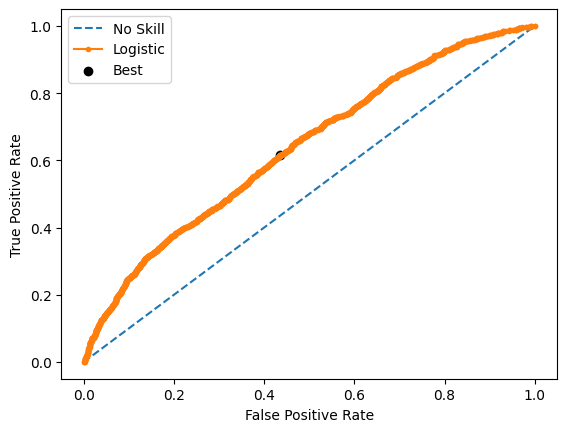

In [ ]:
# ROC-AUC
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
# Classification report
## Complete the code to obtain the classification report Hint: use y_val
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      1274
           1       0.26      0.59      0.36       326

    accuracy                           0.57      1600
   macro avg       0.55      0.58      0.52      1600
weighted avg       0.72      0.57      0.61      1600



* As the number of layers within the neural network has increased the recall score of the model has increased to 0.58.  

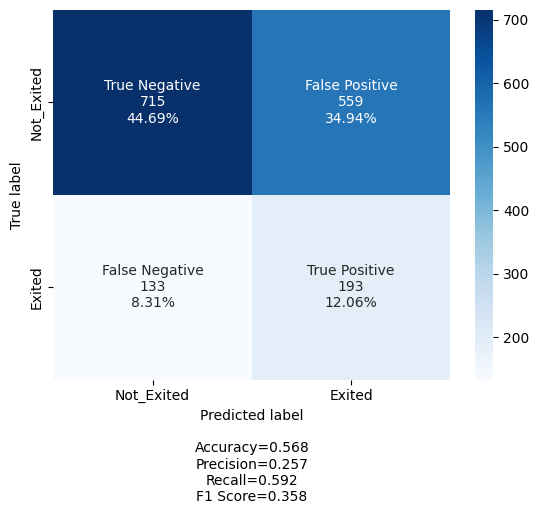

In [ ]:
# Confusion matrix
## Complete the code with y_val and y_pred_e to plot the confusion matrix

cm1=confusion_matrix(y_val,y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Complete the code to add dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainabl

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 27.5452 - accuracy: 0.6139 - val_loss: 2.5165 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 4.2068 - accuracy: 0.6513 - val_loss: 0.6256 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.3213 - accuracy: 0.7502 - val_loss: 0.5867 - val_accuracy: 0.7962
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.8019 - accuracy: 0.7681 - val_loss: 0.5322 - val_accuracy: 0.7962
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.7772 - val_loss: 0.5456 - val_accuracy: 0.7962
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.7816 - val_loss: 0.5658 - val_accuracy: 0.7962
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6528 - accuracy: 0.7764 - val_loss: 0.5316 - val_accuracy: 0.796

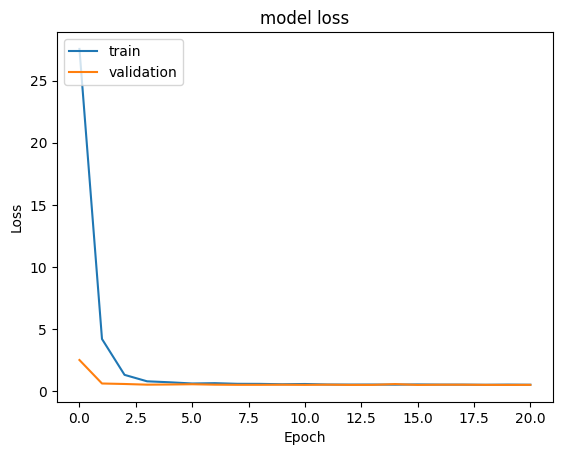

In [ ]:
# Loss function
# Complete the code to plot the Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* In the plot above we see that the train and validation curves are smooth.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.267073, G-Mean=0.495


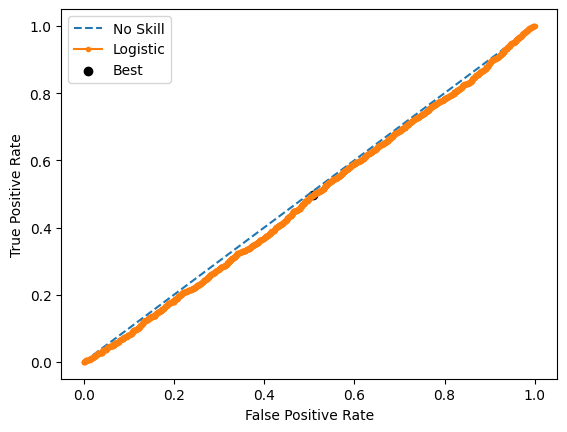

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# Classification report
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.55      0.66      1274
           1       0.22      0.48      0.30       326

    accuracy                           0.54      1600
   macro avg       0.51      0.52      0.48      1600
weighted avg       0.69      0.54      0.58      1600



* The Dropout technique has helped the model reduce the loss function for both train and validation sets.
* The recall score has decreased.

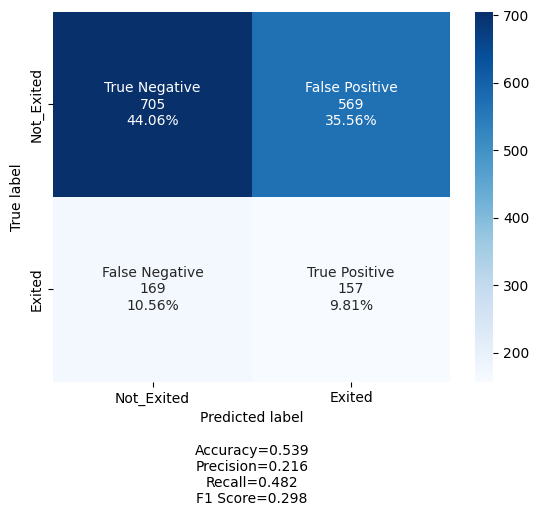

In [ ]:
# Confusion matrix
# Complete the code to obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

* Recall and F1-scores have decreased, Hyperparameter Optimisation Techiniques will be used to help increase these scores through the use of RandomSearchCV and GridSearchCV.

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Complete the code to compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
# Using Grid search
## Complete the code by calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Complete the code by using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train,validation_data = (X_val, y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 2s 5ms/step - loss: 31.4467 - accuracy: 0.6900 - val_loss: 0.7493 - val_accuracy: 0.7962
Best: 0.796250 using {'batch_size': 40, 'lr': 0.01}


In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
160/160 [==============================] - 2s 3ms/step - loss: 23.6722 - accuracy: 0.6781 - val_loss: 1.3838 - val_accuracy: 0.7962
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.7352 - val_loss: 0.6096 - val_accuracy: 0.7962
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.7802 - val_loss: 0.5144 - val_accuracy: 0.7962
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5237 - accuracy: 0.7925 - val_loss: 0.5193 - val_accuracy: 0.7862
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5104 - accuracy: 0.7956 - val_loss: 0.5082 - val_accuracy: 0.7962
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5082 - accuracy: 0.7962 - val_loss: 0.5057 - val_accuracy: 0.7962
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5069 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.796

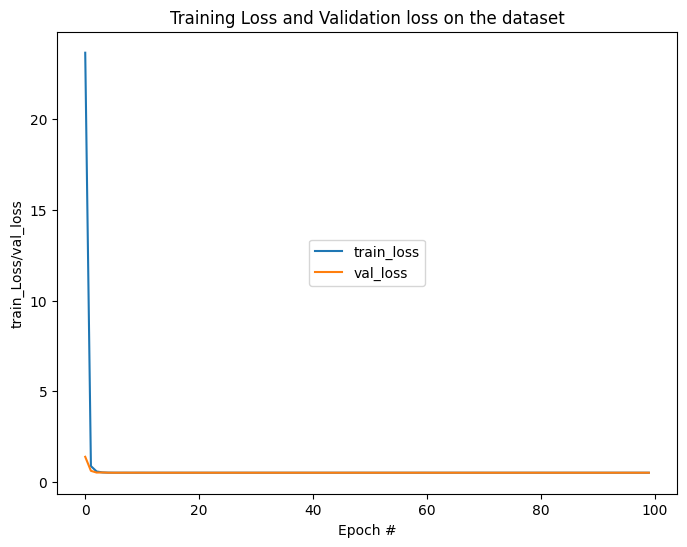

In [ ]:
# Loss function
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

200/200 [==============================] - 0s 1ms/step
Best Threshold=1.212889, G-Mean=0.000


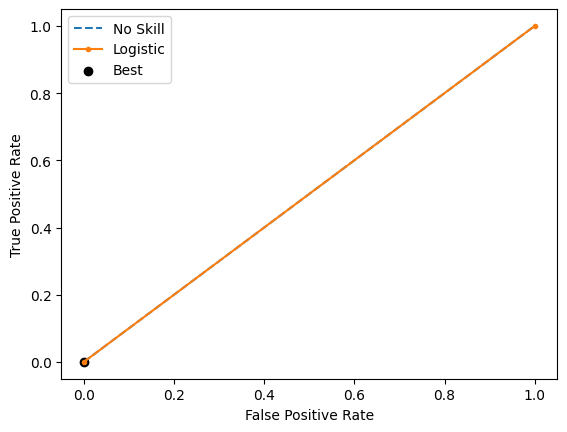

In [ ]:
# Threshold
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 2ms/step
[[0.2128886]
 [0.2128886]
 [0.2128886]
 ...
 [0.2128886]
 [0.2128886]
 [0.2128886]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
# Classification report
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1274
           1       0.00      0.00      0.00       326

    accuracy                           0.80      1600
   macro avg       0.40      0.50      0.44      1600
weighted avg       0.63      0.80      0.71      1600



* The F1-Score has increased however the recall score has decreased.

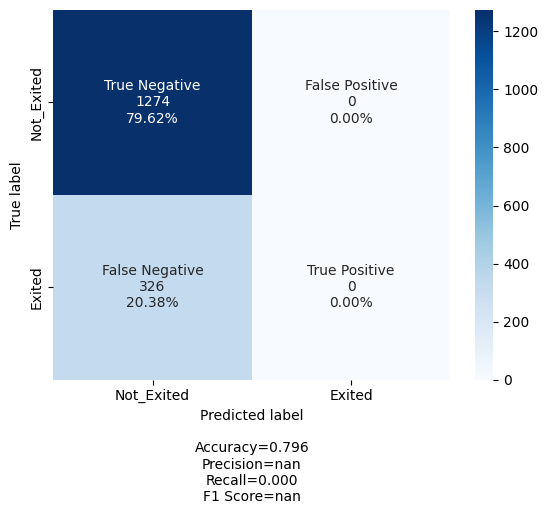

In [ ]:
# Confusion matrix
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

* The model is able to accurately predict 79% of client who will not exit the bank.

### Model Improvement: Neural Network model with balanced data

In [ ]:
# Applying SMOTE to the data
## Complete the code to apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 13)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: ylabel='count'>

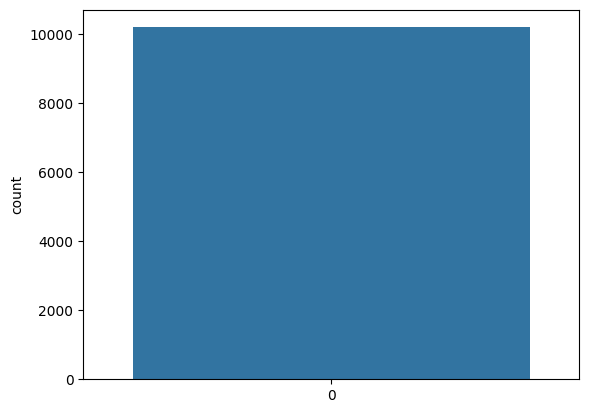

In [ ]:
sns.countplot(y_train['Exited'])

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Sequential model
## Complete the code to initilaize a sequential model
model_4 = Sequential()

# Complete the code to add a input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout rate=0.2
model_4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Complete the code to add dense layers with 8 neurons
model_4.add(Dense(8,activation='relu'))

# Complete the code to add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Complete the code to obtain the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainabl

In [ ]:
# Complete the code to define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 26.9350 - accuracy: 0.5011 - val_loss: 0.6500 - val_accuracy: 0.6112
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 2.3666 - accuracy: 0.4981 - val_loss: 0.6230 - val_accuracy: 0.7962
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 1.0689 - accuracy: 0.4996 - val_loss: 0.5872 - val_accuracy: 0.7962
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.9060 - accuracy: 0.4911 - val_loss: 0.7475 - val_accuracy: 0.3000
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.8265 - accuracy: 0.4959 - val_loss: 0.6590 - val_accuracy: 0.7962
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.7824 - accuracy: 0.4971 - val_loss: 0.6829 - val_accuracy: 0.7962
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.7499 - accuracy: 0.5061 - val_loss: 0.8732 - val_accuracy: 0.213

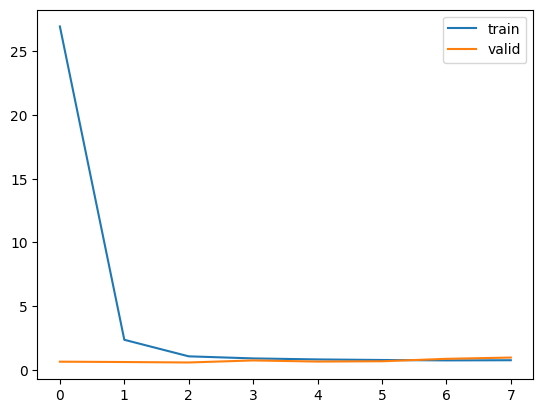

In [ ]:
# Loss function
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.680817, G-Mean=0.497


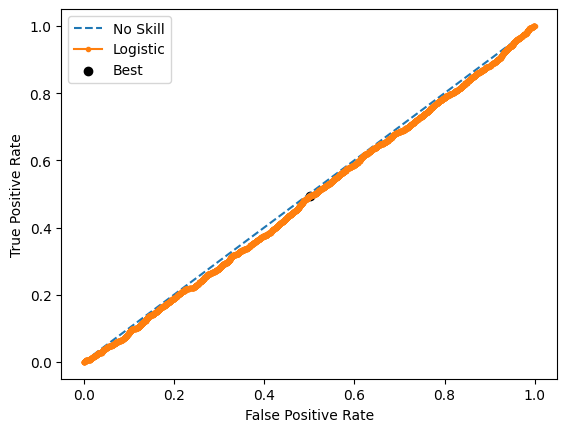

In [ ]:
## Complete the code to find the optimal threshold using X_train
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# Classification report
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.55      0.66      1274
           1       0.22      0.48      0.30       326

    accuracy                           0.54      1600
   macro avg       0.51      0.52      0.48      1600
weighted avg       0.69      0.54      0.58      1600



* This model has decreased the F1-score but has increased the recall score.  

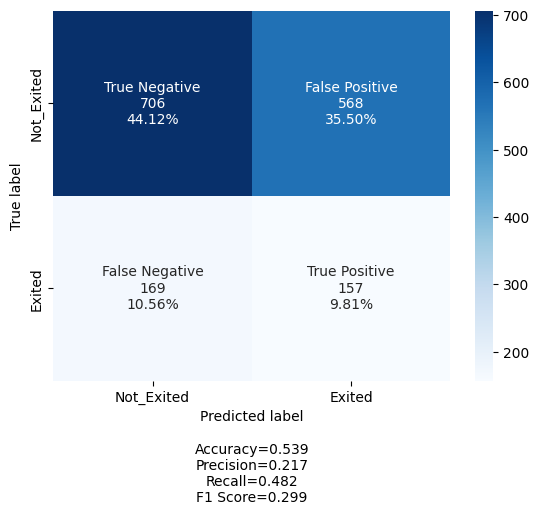

In [ ]:
# Confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

* 44% of clients were correctly predicted as not exiting the bank.
* 9.8% of clients were correctly predicted to have exited the bank.

## Final Model

319/319 [==============================] - 1s 1ms/step
Best Threshold=0.000254, G-Mean=0.593


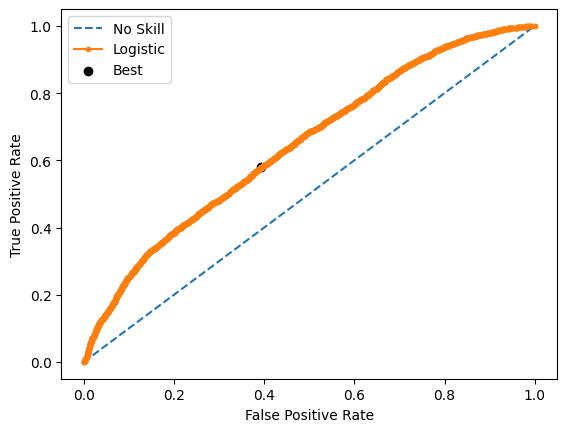

In [ ]:
# predict probabilities using the best model
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Complete the code to Predict the X_test data using the best model
y_pred_test = model_e.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[False]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [ True]]


In [ ]:
# Classification report
## Complete the code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.61      0.71      1593
           1       0.28      0.59      0.38       407

    accuracy                           0.60      2000
   macro avg       0.57      0.60      0.54      2000
weighted avg       0.74      0.60      0.64      2000



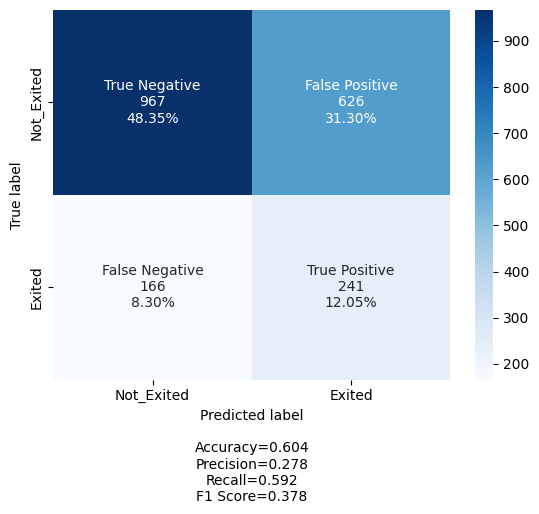

In [ ]:
# Confusion matrix
# Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

* I have trained 5 models with some changes in archtiecture and optimizers.
* Model 2 using the Adam optimiser had the highest recall score of all models.
* Model 2 has a 61% recall on test data, this means that the model will correctly classify a client who may or may not exit the bank.
* The model can be further improved by increasing the number of dense layers, learning rate, and number of neurons in the hidden layer.  

___